#Projet INGE 2: Prévision des séries temporelles financières à l'aide de Transformer

Les données de séries temporelles jouent un rôle crucial dans la compréhension et la prédiction des tendances des marchés financiers. Ces dernières années, les méthodes statistiques traditionnelles ont été complétées par des techniques d'apprentissage profond, telles que les réseaux Long Short-Term Memory (LSTM). Cependant, ces modèles peuvent rencontrer des défis pour capturer les dépendances à long terme. Ce projet explore l'application de l'architecture Transformer, initialement conçue pour le traitement du langage naturel, dans le domaine de l'analyse des séries temporelles pour les marchés financiers.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


def simple_moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

def decompose_series(series, return_period=1):
  res = sm.tsa.seasonal_decompose(series, period=52)
  fig = res.plot()
  fig.set_figheight(8)
  fig.set_figwidth(15)
  plt.show()


def plot_autocorrelation(series, lags=30):
    plot_acf(series, lags=lags)
    plt.show()

def apply_boxcox_transformation(series):
    transformed_series, lam = boxcox(series)
    return transformed_series, lam



#DATASET

In [20]:
cac40_data = yf.download('^FCHI', start='2014-01-01', end='2024-01-01')
time_series_data = cac40_data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


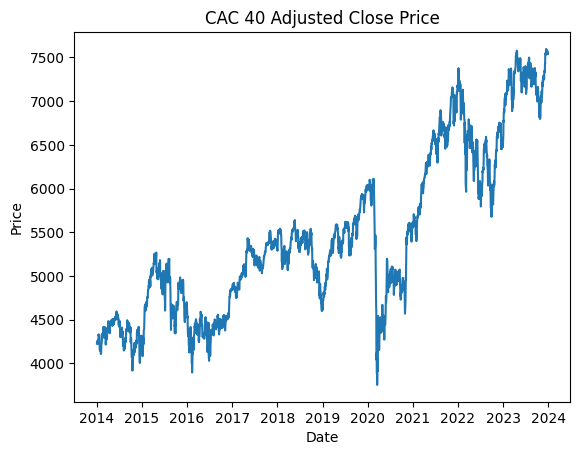

In [21]:
plt.plot(time_series_data)
plt.title('CAC 40 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

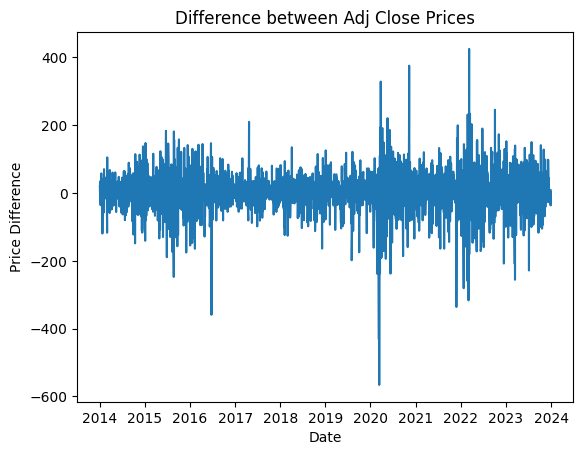

In [22]:
difference_series = time_series_data.diff().dropna()

plt.plot(difference_series)
plt.title('Difference between Adj Close Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

#SMA

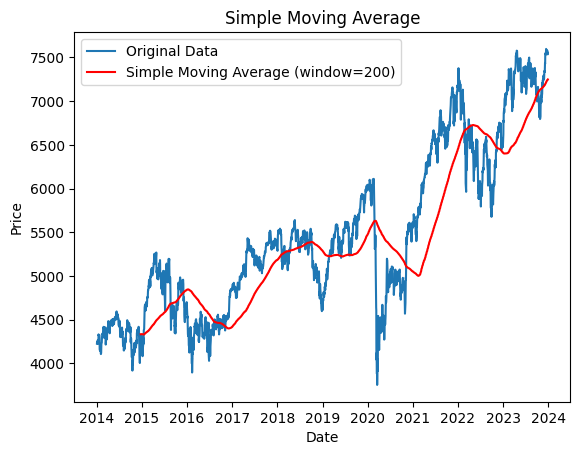

In [23]:
sma = simple_moving_average(time_series_data, 250)

plt.plot(time_series_data, label='Original Data')
plt.plot(sma, label='Simple Moving Average (window=200)', color='red')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Decomposition

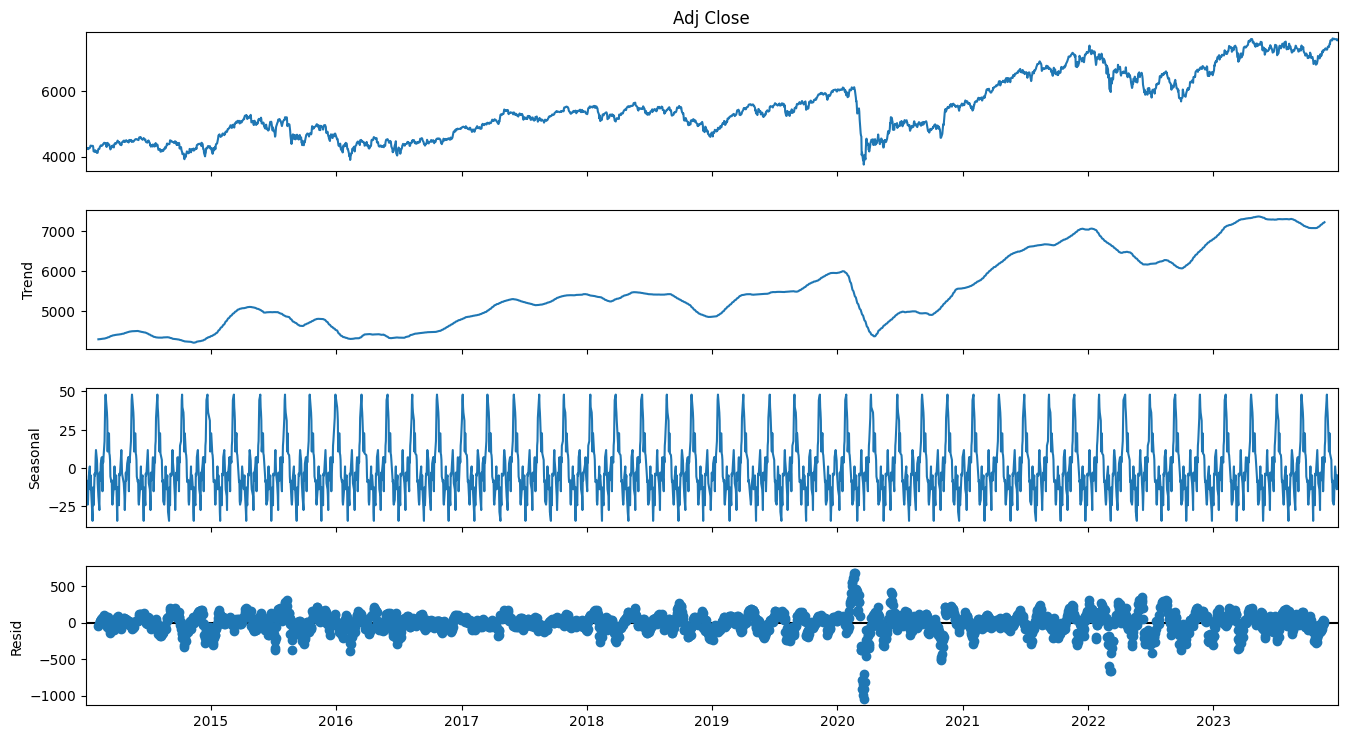

In [24]:
decompose_series(time_series_data)

#autocorrelation

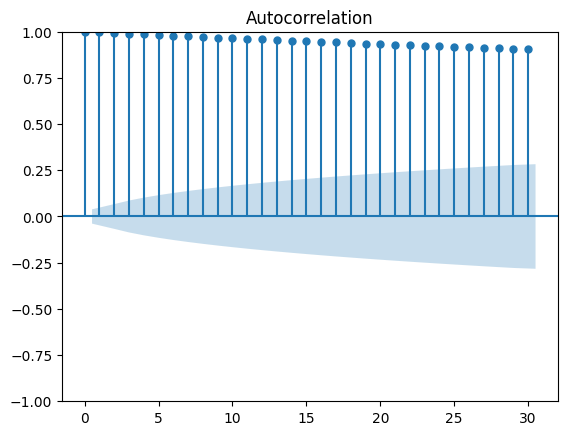

In [25]:
plot_autocorrelation(time_series_data)